<a href="https://colab.research.google.com/github/4DavidC/covid-19/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
!pip install --upgrade --quiet gspread 

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#total caces from drive

In [0]:
total_cases = gc.open('cases_21032020').sheet1
total_cases = total_cases.get_all_values()
total_cases = pd.DataFrame.from_records(total_cases)
total_cases.columns = total_cases.iloc[0]
total_cases = total_cases.drop(total_cases.index[0])
total_cases[[ 'Year', 'Total confirmed cases of COVID-19 (cases)']] = total_cases[['Year', 'Total confirmed cases of COVID-19 (cases)']].astype(int)
total_cases.head()

#total deaths from drive

In [0]:
total_deaths = gc.open('deaths_21032020').sheet1
total_deaths = total_deaths.get_all_values()
total_deaths = pd.DataFrame.from_records(total_deaths)
total_deaths.columns = total_deaths.iloc[0]
total_deaths = total_deaths.drop(total_deaths.index[0])
total_deaths[[ 'Year', 'Total confirmed deaths due to COVID-19 (deaths)']] = total_deaths[['Year', 'Total confirmed deaths due to COVID-19 (deaths)']].astype(int)
total_deaths.head()

In [0]:
total_cases['deaths'] = total_deaths['Total confirmed deaths due to COVID-19 (deaths)'].values

In [0]:
a1 = np.random.randint(total_cases.shape[0], size=10)
total_cases.iloc[a1]

In [0]:
total_deaths.iloc[a1]

In [0]:
total_cases.columns

Index(['DateRep', 'Cases', 'Deaths', 'Countries and territories', 'GeoId'], dtype='object', name=0)

In [0]:
unique_2 = total_cases.groupby(['Year']).sum()
unique_2['prc'] = 100 * (unique_2['deaths']/unique_2['Total confirmed cases of COVID-19 (cases)'])
unique_2['ni'] = pd.date_range('31/12/2019', periods=82, freq='D')
#unique_2 = unique_2.reindex(date_index2)
unique_2 = unique_2.set_index('ni')
unique_2

In [0]:
unique_2.columns

NameError: ignored

In [0]:
unique_2.index

In [0]:
plt.figure(figsize=(30,8))
x = np.array(unique_2.index)
y = np.around(unique_2['prc'], decimals=1)
plt.plot(x,y, 'g', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(rotation=90)
plt.xticks(unique_2.index)
for a,b in zip(x, y): 
    plt.text(a, b, str(b))
plt.show()

#total data

In [0]:
# total_cases = gc.open('COVID-19-2020-03-23').sheet1
# total_cases = total_cases.get_all_values()
# total_cases = pd.DataFrame.from_records(total_cases)
# total_cases.columns = total_cases.iloc[0]
# total_cases = total_cases.drop(total_cases.index[0])

path = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-24.xlsx'
total_cases = pd.read_excel(path , error_bad_lines=False)
total_cases[['Day', 'Month', 'Year' ,'Cases', 'Deaths']] = total_cases[['Day', 'Month', 'Year','Cases', 'Deaths']].astype(int)
total_cases['DateRep'] = pd.to_datetime(total_cases[['Day', 'Month', 'Year']])
total_cases = total_cases.drop(['Day', 'Month', 'Year'], axis=1)
#total_cases.columns
# total_cases.dtypes
total_cases.head()

,DateRep,Cases,Deaths,Countries and territories,GeoId
0,2020-03-24,6,1,Afghanistan,AF
1,2020-03-23,10,0,Afghanistan,AF
2,2020-03-22,0,0,Afghanistan,AF
3,2020-03-21,2,0,Afghanistan,AF
4,2020-03-20,0,0,Afghanistan,AF


In [0]:
# total_cases['Countries and territories'].unique()
#total_cases['Countries and territories'].nunique()


In [0]:
total_cases_Italy = total_cases.loc[total_cases['Countries and territories'] == 'Italy']
total_cases_USA = total_cases.loc[total_cases['Countries and territories'] == 'United_States_of_America']
total_cases_UK = total_cases.loc[total_cases['Countries and territories'] == 'United_Kingdom']
total_cases_Spain = total_cases.loc[total_cases['Countries and territories'] == 'Spain']

In [0]:
group_by_day = total_cases_UK.groupby(['DateRep']).sum()
group_by_day['prc'] = 100 * (group_by_day['Deaths']/group_by_day['Cases'])
group_by_day['cum_cases'] = group_by_day['Cases'].cumsum()
group_by_day['cum_deaths'] = group_by_day['Deaths'].cumsum()
group_by_day['cum_prc'] = 100 * (group_by_day['cum_deaths']/group_by_day['cum_cases'])
group_by_day['growth_of_cases'] = 100 * (group_by_day['Cases']/group_by_day['cum_cases'])
group_by_day['growth_of_deaths'] = 100 * (group_by_day['Deaths']/group_by_day['cum_deaths'])
group_by_day = group_by_day.fillna(0)
group_by_day['prc'].values[group_by_day['prc'].values > 100] = 0
#group_by_day = group_by_day.set_index('DateRep', inplace=True)
#group_by_day = group_by_day.set_index('month')
#group_by_day = group_by_day.set_index(pd.DatetimeIndex(group_by_day['DareRep']),inplace=True)
group_by_day.columns

Index(['Cases', 'Deaths', 'prc', 'cum_cases', 'cum_deaths', 'cum_prc',
       'growth_of_cases', 'growth_of_deaths'],
      dtype='object')

In [0]:
group_by_day = group_by_day.iloc[-27:,:]
# group_by_day
np.array(group_by_day.index,dtype='datetime64[D]')


array(['2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24'], dtype='datetime64[D]')

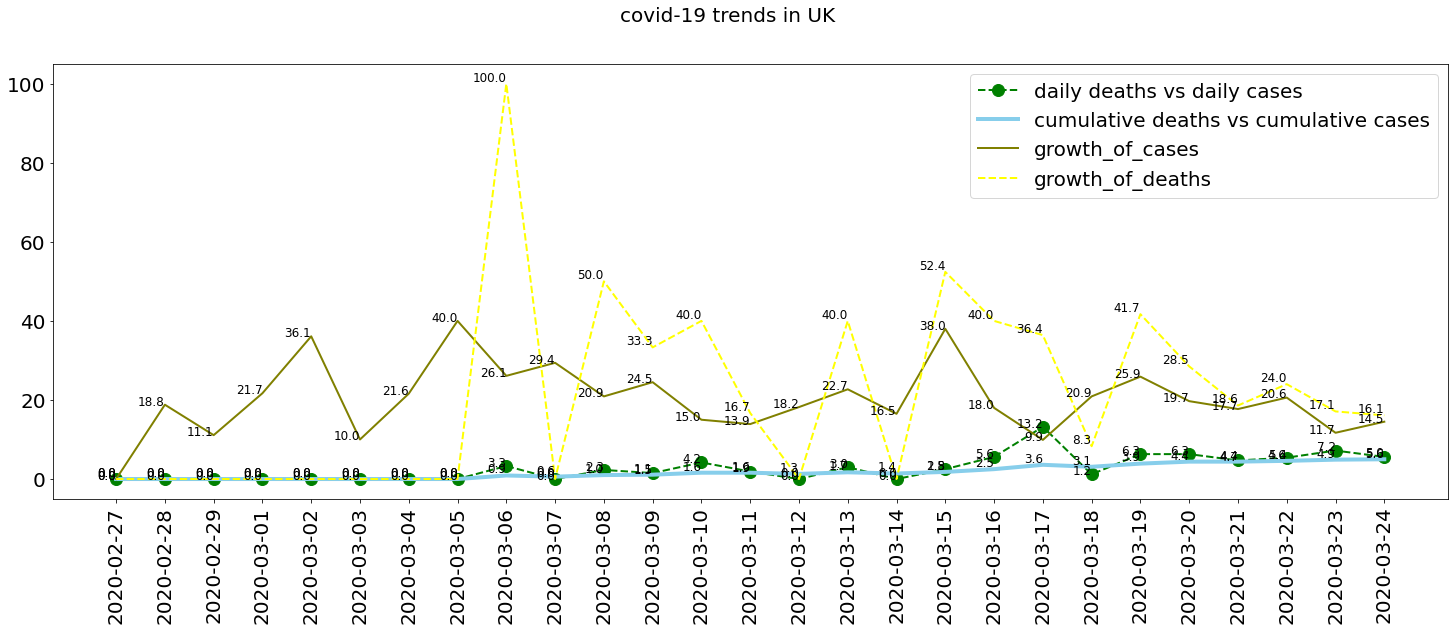

In [0]:
plt.figure(figsize=(25,8))
# plt.suptitle('covid-19 trends in world', fontsize=20)
# plt.suptitle('covid-19 trends in Italy', fontsize=20)
# plt.suptitle('covid-19 trends in USA', fontsize=20)
plt.suptitle('covid-19 trends in UK', fontsize=20)
# plt.suptitle('covid-19 trends in Spain', fontsize=20)
x = np.array(group_by_day.index)
y1 = np.around(group_by_day['prc'], decimals=1)
y2 = np.around(group_by_day['cum_prc'], decimals=1)
y3 = np.around(group_by_day['growth_of_cases'], decimals=1)
y4 = np.around(group_by_day['growth_of_deaths'], decimals=1)
y5 = np.array(group_by_day['Cases'])
y6 = np.array(group_by_day['Deaths'])
plt.plot(x,y1, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='daily deaths vs daily cases')
plt.plot(x, y2, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='cumulative deaths vs cumulative cases')
plt.plot(x, y3,  marker='', color='olive', linewidth=2, label='growth_of_cases')
plt.plot(x, y4,  marker='', color='yellow', linewidth=2, linestyle='dashed', label= 'growth_of_deaths')

# plt.legend(loc='lower right')
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.xticks(group_by_day.index)
for a,b in zip(x, y1): 
    plt.text(a, b, str(b), fontsize=12, horizontalalignment='right', verticalalignment='baseline')
for a,b in zip(x, y2): 
    plt.text(a, b, str(b), fontsize=12, horizontalalignment='right', verticalalignment='bottom')
for a,b in zip(x, y3): 
    plt.text(a, b, str(b), fontsize=12, horizontalalignment='right', verticalalignment='baseline')
for a,b in zip(x, y4): 
    plt.text(a, b, str(b), fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.show()

In [0]:
x = np.array(group_by_day.index,dtype='datetime64[D]')
y1 = np.around(group_by_day['prc'], decimals=1)
y2 = np.around(group_by_day['cum_prc'], decimals=1)
y3 = np.around(group_by_day['growth_of_cases'], decimals=1)
y4 = np.around(group_by_day['growth_of_deaths'], decimals=1)
y5 = np.array(group_by_day['Cases'])
y6 = np.array(group_by_day['Deaths'])

fig = plt.figure(figsize=(25,8))

# width = 0.35 
# ax.bar(x - width/2, y5, width, label='Cases')
# ax.bar(x + width/2, y6, width, label='Deaths')

ax = group_by_day['Cases'].plot(kind="bar" , color = 'indianred')#, alpha=0.7)
ax = group_by_day['Deaths'].plot(kind="bar" , color = 'red')#, alpha=0.7)

ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),y1,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='daily deaths vs daily cases')
ax2.plot(ax.get_xticks(),y2,markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='cumulative deaths vs cumulative cases')
ax2.plot(ax.get_xticks(),y3,marker='', color='olive', linewidth=2, label='growth_of_cases')
ax2.plot(ax.get_xticks(),y4,marker='', color='yellow', linewidth=2, linestyle='dashed', label= 'growth_of_deaths')


# plt.plot(x,y1, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='daily deaths vs daily cases')
# plt.plot(x, y2, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='cumulative deaths vs cumulative cases')
# plt.plot(x, y3,  marker='', color='olive', linewidth=2, label='growth_of_cases')
# plt.plot(x, y4,  marker='', color='yellow', linewidth=2, linestyle='dashed', label= 'growth_of_deaths')




ax.set_xticklabels(x,fontsize=20)
ax.set_ylim(0,np.max(y5))
ax2.set_ylim(0,100)
ax2.grid(False)


plt.show()

# tables

In [0]:
path = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-23.xlsx'
total_cases = pd.read_excel(path , error_bad_lines=False)